   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  IfAlone  
0      0         A/5 21171   7.2500   NaN        S           1        0  
1      0          PC 17599  71.2833   C85        C           1        0  
2      0  STON/O2. 3101282   7.9250   NaN        S           0        1  
3      0            1138

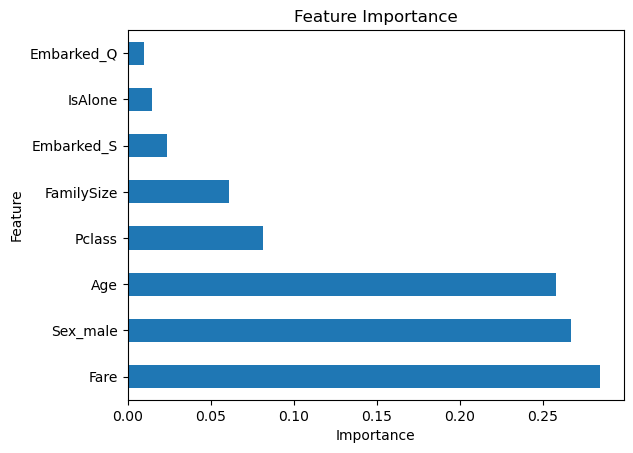

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
titanic_data = pd.read_csv("C:\\Users\\Sheeba Janet\\Downloads\\Titanic-Dataset.csv")

# Explore the dataset
print(titanic_data.head())  # View the first few rows
print(titanic_data.info())  # Summary of the dataset

# Preprocessing
# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

# Feature engineering
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']
titanic_data['IsAlone'] = np.where(titanic_data['FamilySize'] > 0, 0, 1)

# Encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

# Select features and target variable
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = titanic_data[features]
y = titanic_data['Survived']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=features)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
